<a href="https://colab.research.google.com/github/PabloJRW/clustering/blob/main/customer_personality_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

### Variables Description

#### People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

#### Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

####Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [2]:
data_path = 'https://raw.githubusercontent.com/PabloJRW/clustering/main/datasets/marketing_campaign.csv'
df = pd.read_csv(data_path, delimiter="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
# Valores nulos
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
#Entradas duplicadas
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [15]:
# Cantidad de valores únicos por columna
for col in df.columns:
  print(f"{col}: {df[col].nunique()}")

ID: 2240
Year_Birth: 59
Education: 5
Marital_Status: 8
Income: 1974
Kidhome: 3
Teenhome: 3
Dt_Customer: 663
Recency: 100
MntWines: 776
MntFruits: 158
MntMeatProducts: 558
MntFishProducts: 182
MntSweetProducts: 177
MntGoldProds: 213
NumDealsPurchases: 15
NumWebPurchases: 15
NumCatalogPurchases: 14
NumStorePurchases: 14
NumWebVisitsMonth: 16
AcceptedCmp3: 2
AcceptedCmp4: 2
AcceptedCmp5: 2
AcceptedCmp1: 2
AcceptedCmp2: 2
Complain: 2
Z_CostContact: 1
Z_Revenue: 1
Response: 2
Age: 59
TotalSpent: 1054
NumTotalPurchases: 39
YearsEnrolled: 3


In [7]:
# Borrado de variables que no aportan información 
# Contienen un solo valor
df[['Z_CostContact', 'Z_Revenue']].drop(axis=1, inplace=True)

# Conversión de variable a tipo fecha
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer, dayfirst=True)

# Feature Engineering
last_year = 2014
df['Age'] = last_year - df['Year_Birth']
spent_vars = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
df['TotalSpent'] = df[spent_vars].sum(axis=1)
purchases_vars = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
df['NumTotalPurchases'] = df[purchases_vars].sum(axis=1) 
df['YearsEnrolled'] = last_year - df['Dt_Customer'].dt.year

In [19]:
vars_for_cluster = ['Age','TotalSpent','NumTotalPurchases','YearsEnrolled']
df2 = df[vars_for_cluster].copy()
df2

,Age,TotalSpent,NumTotalPurchases,YearsEnrolled
0,57,1617,25,2
1,60,27,6,0
2,49,776,21,1
3,30,53,8,0
4,33,422,19,0
...,...,...,...,...
2235,47,1341,18,1
2236,68,444,22,0
2237,33,1241,19,0
2238,58,843,23,0


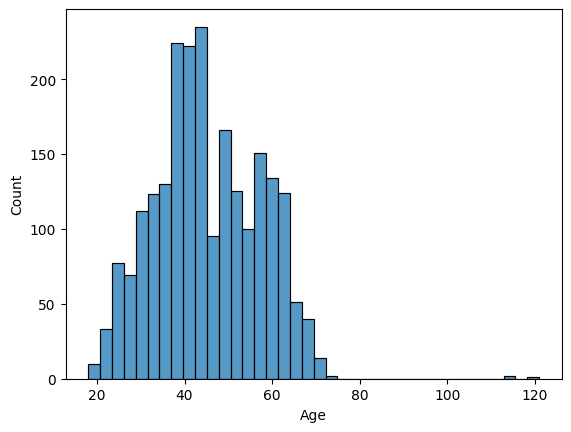

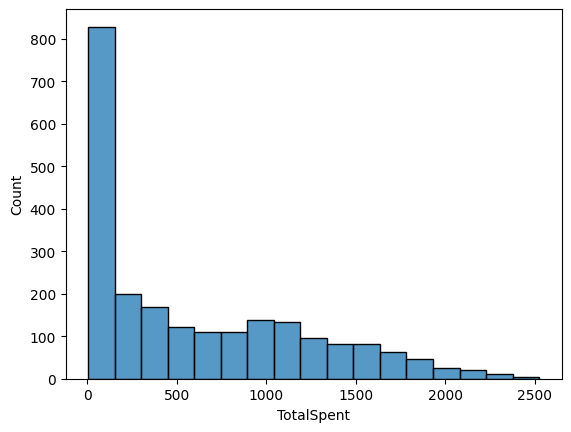

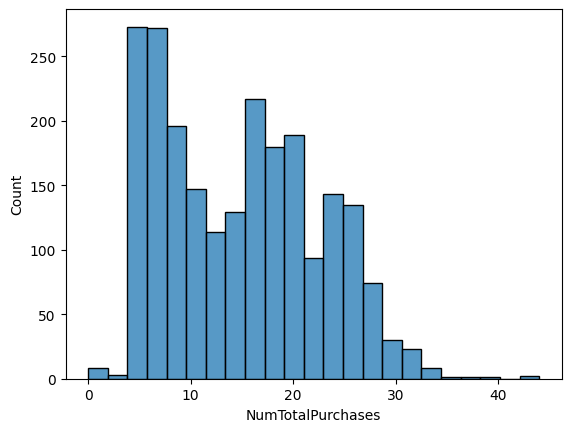

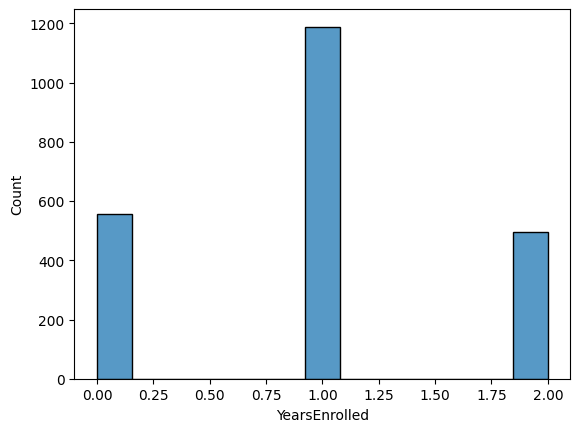

In [21]:
for var in vars_for_cluster:
  sns.histplot(df2[var])
  plt.show()

# Clustering

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

#### Standarización

In [22]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df2)
df_scaled

array([[ 0.98534473,  1.67941681,  1.32082612,  1.50222494],
       [ 1.23573295, -0.96127545, -1.15459595, -1.42003634],
       [ 0.3176428 ,  0.28267329,  0.79968463,  0.0410943 ],
       ...,
       [-1.01776106,  1.05495122,  0.53911389, -1.42003634],
       [ 1.06880747,  0.39394775,  1.06025538, -1.42003634],
       [ 1.23573295, -0.7204576 , -0.50316909,  1.50222494]])

### PCA

In [41]:
pca = PCA()
pca.fit_transform(df_scaled)
df_reduced = pca.transform(df_scaled)
pca.explained_variance_ratio_

array([0.46448584, 0.25704214, 0.21780201, 0.06067001])

In [44]:
pca_components = pd.DataFrame(df_reduced[:, :3].copy())
pca_components

,0,1,2
0,2.582600,-0.252919,0.970451
1,-1.507330,1.853121,0.255541
2,0.804250,0.221535,0.006313
3,-1.829306,-0.009841,-1.379598
4,-0.402865,0.197828,-1.650377
...,...,...,...
2235,1.126634,0.084908,-0.289972
2236,0.499626,2.382665,0.108151
2237,0.497982,0.189910,-2.029388
2238,0.850973,1.758647,-0.625339


## KMeans

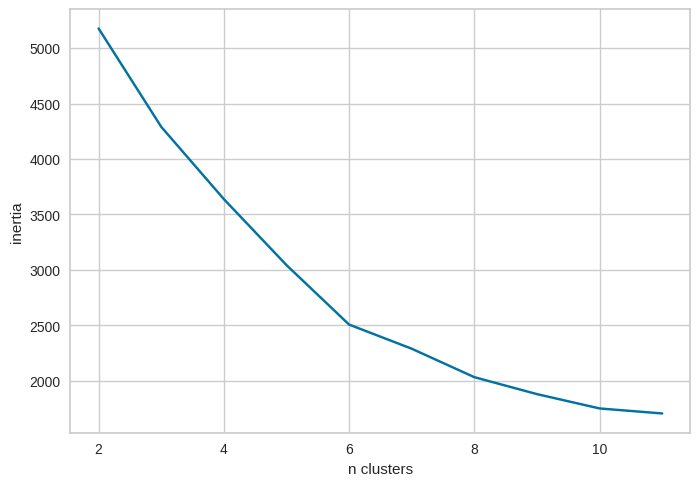

In [45]:
inertia = []
K = range(2, 12)
for n in K:
  kmeans = KMeans(n_clusters=n, n_init='auto')
  kmeans.fit(pca_components)
  inertia.append(kmeans.inertia_)

plt.plot(K, inertia)
plt.xlabel("n clusters")
plt.ylabel("inertia")
plt.show()

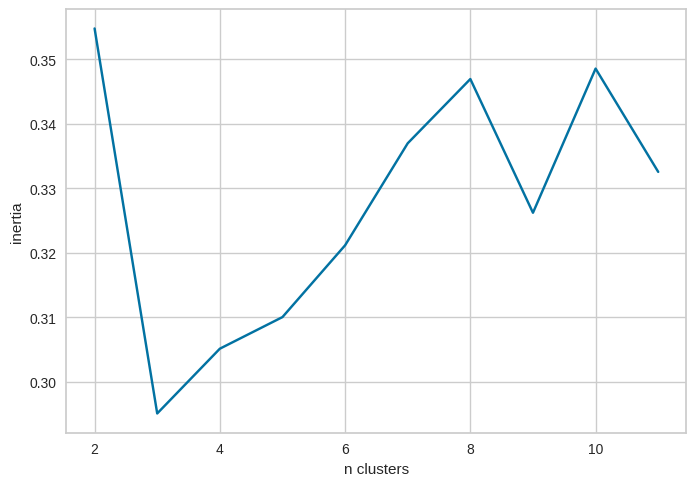

In [46]:
silhouette_scores = []
K = range(2, 12)
for n in K:
  kmeans = KMeans(n_clusters=n, n_init='auto')
  kmeans.fit(pca_components)
  y_preds = kmeans.predict(pca_components)
  silhouette_scores.append(silhouette_score(pca_components, y_preds))

plt.plot(K, silhouette_scores)
plt.xlabel("n clusters")
plt.ylabel("inertia")
plt.show()

SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=6, n_init='auto'))

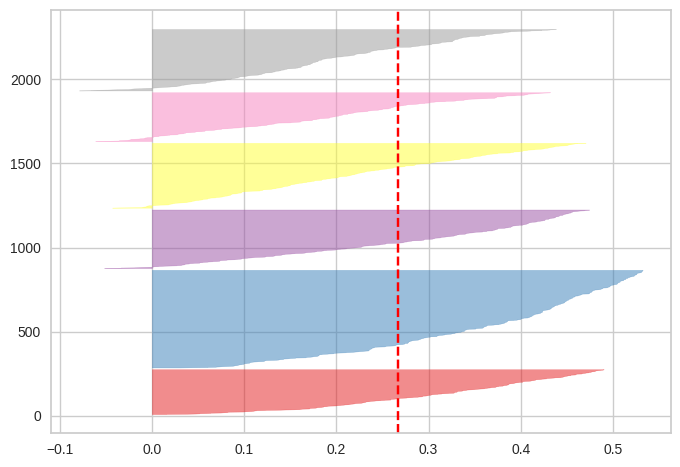

In [50]:
kmeans = KMeans(n_clusters=6, n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, color='yellowbrick')
visualizer.fit(df_scaled)

In [51]:
silhouette_score(pca_components, y_preds)

0.3325598655218838

## Hierarchical Clustering

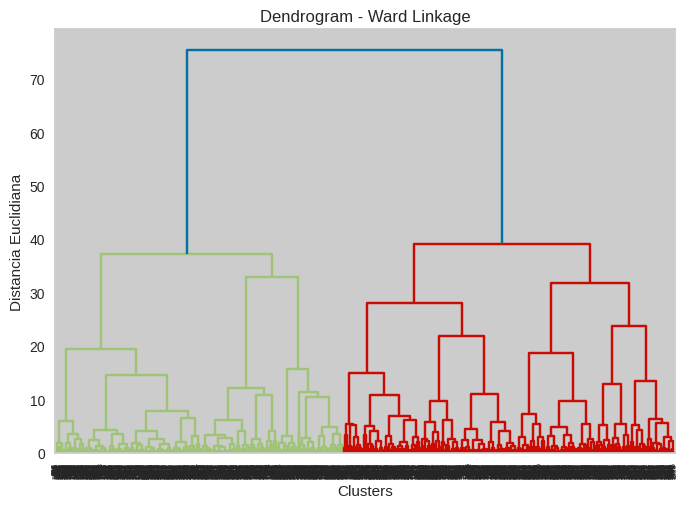

In [53]:
dendro = dendrogram(linkage(pca_components, method='ward'))
plt.title("Dendrogram - Ward Linkage")
plt.xlabel("Clusters")
plt.ylabel("Distancia Euclidiana")
plt.show()

In [56]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
hc_preds = hc.fit_predict(pca_components)
df2['hc_cluster'] = hc_preds

<Figure size 600x600 with 0 Axes>

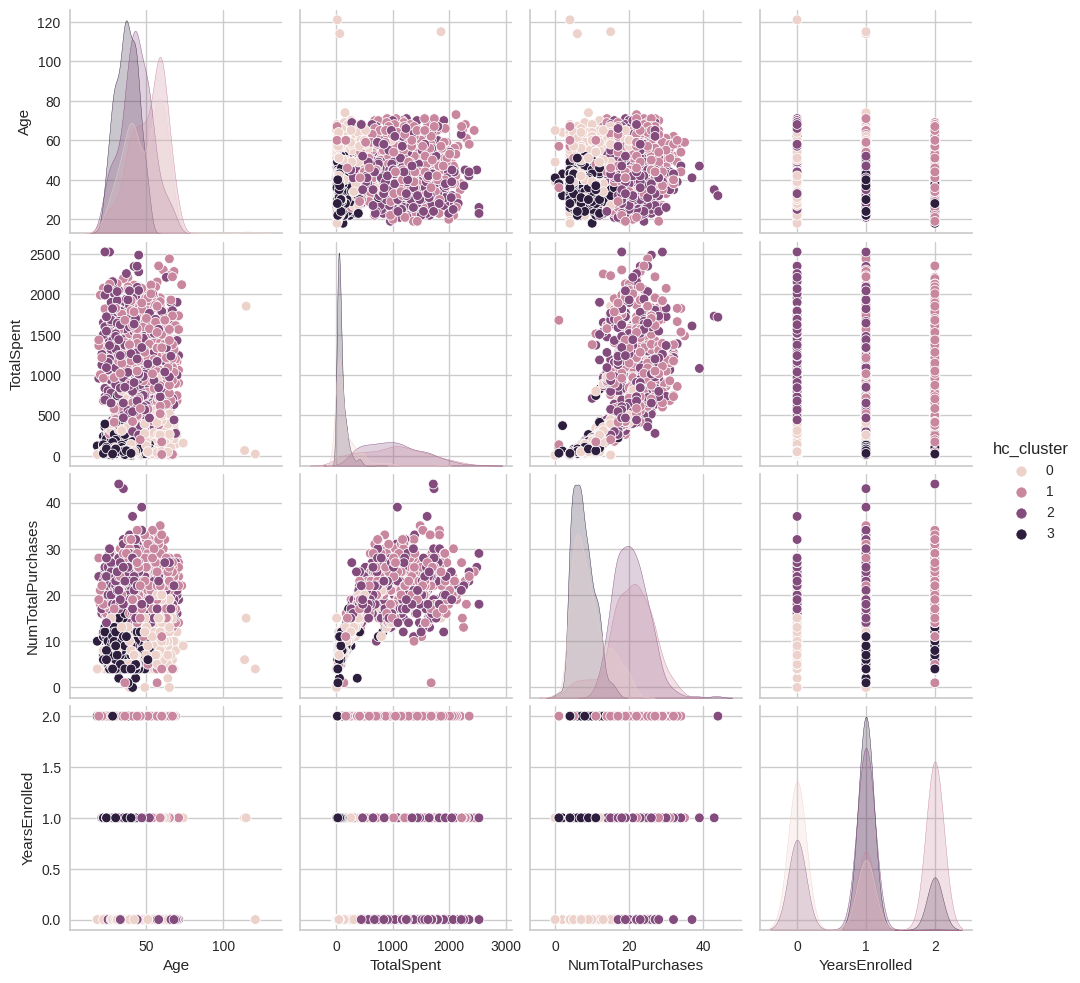

In [57]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df2, hue='hc_cluster')
plt.show()